In [235]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv("listing_review_cleaned_500_with_feature_names.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,listing_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,bedrooms,...,without,wonderful,work,worth,would,yet,negative_score,positive_score,neutral_score,compound_score
0,0,0,44077,1.00,0.99,1,2,Private room,2,1.0,...,0.002285,0.033321,0.006870,0.001969,0.035920,0.002068,0.009267,0.339740,0.650990,0.877849
1,1,1,85156,1.00,0.99,1,2,Private room,2,1.0,...,0.004934,0.030172,0.002867,0.001443,0.029913,0.001348,0.008484,0.368911,0.622589,0.892961
2,2,2,159889,1.00,0.95,0,4,Private room,1,1.0,...,0.002719,0.017128,0.004002,0.000523,0.029593,0.000596,0.011114,0.338574,0.650303,0.791356
3,3,3,162809,0.92,0.87,1,2,Private room,6,2.0,...,0.006063,0.015999,0.002672,0.002716,0.027782,0.001912,0.013310,0.372166,0.614529,0.856854
4,4,4,165828,1.00,0.91,0,5,Entire home/apt,5,1.0,...,0.004330,0.019555,0.012654,0.005835,0.039574,0.004449,0.014190,0.265179,0.720702,0.758196


In [233]:
empty_cols = df.columns[df.isna().any()].tolist()
empty_cols

[]

# Normalization

In [237]:
df.drop(["Unnamed: 0","Unnamed: 0.1","listing_id","room_type"],axis=1,inplace=True)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price_x,minimum_nights,maximum_nights,...,without,wonderful,work,worth,would,yet,negative_score,positive_score,neutral_score,compound_score
0,1.00,0.99,1,2,2,1.0,2.0,70.0,3,1125,...,0.002285,0.033321,0.006870,0.001969,0.035920,0.002068,0.009267,0.339740,0.650990,0.877849
1,1.00,0.99,1,2,2,1.0,1.0,67.0,3,21,...,0.004934,0.030172,0.002867,0.001443,0.029913,0.001348,0.008484,0.368911,0.622589,0.892961
2,1.00,0.95,0,4,1,1.0,1.0,45.0,2,21,...,0.002719,0.017128,0.004002,0.000523,0.029593,0.000596,0.011114,0.338574,0.650303,0.791356
3,0.92,0.87,1,2,6,2.0,4.0,80.0,1,12,...,0.006063,0.015999,0.002672,0.002716,0.027782,0.001912,0.013310,0.372166,0.614529,0.856854
4,1.00,0.91,0,5,5,1.0,3.0,251.0,3,365,...,0.004330,0.019555,0.012654,0.005835,0.039574,0.004449,0.014190,0.265179,0.720702,0.758196


In [238]:
from sklearn.preprocessing import MinMaxScaler
norm_model = MinMaxScaler()
norm_model.fit(df)
norm = norm_model.fit_transform(df)
type(norm)

numpy.ndarray

In [239]:
norm_df = pd.DataFrame(norm,columns = df.columns)
norm_df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price_x,minimum_nights,maximum_nights,...,without,wonderful,work,worth,would,yet,negative_score,positive_score,neutral_score,compound_score
0,1.00,0.99,1.0,0.000302,0.066667,0.000000,0.058824,0.006707,0.002503,1.000000,...,0.007630,0.033321,0.018880,0.002385,0.081698,0.004432,0.025982,0.339740,0.650990,0.941166
1,1.00,0.99,1.0,0.000302,0.066667,0.000000,0.000000,0.006372,0.002503,0.017794,...,0.016473,0.030172,0.007878,0.001747,0.068036,0.002889,0.023788,0.368911,0.622589,0.948840
2,1.00,0.95,0.0,0.000906,0.000000,0.000000,0.000000,0.003912,0.001252,0.017794,...,0.009079,0.017128,0.010999,0.000634,0.067309,0.001277,0.031160,0.338574,0.650303,0.897240
3,0.92,0.87,1.0,0.000302,0.333333,0.083333,0.176471,0.007825,0.000000,0.009786,...,0.020243,0.015999,0.007342,0.003290,0.063188,0.004098,0.037317,0.372166,0.614529,0.930503
4,1.00,0.91,0.0,0.001208,0.266667,0.000000,0.117647,0.026939,0.002503,0.323843,...,0.014456,0.019555,0.034774,0.007068,0.090010,0.009534,0.039786,0.265179,0.720702,0.880400


In [240]:
y_target_rating = norm_df.iloc[:,[18]].values
y_target_accuracy = norm_df.iloc[:,19].values
y_target_cleanliness = norm_df.iloc[:,20].values
y_target_checkin = norm_df.iloc[:,21].values
y_target_communication = norm_df.iloc[:,22].values
y_target_location = norm_df.iloc[:,23].values
y_target_values = norm_df.iloc[:,[24]].values
X = norm_df.iloc[:, np.r_[0:17, 25:613]].values

In [241]:
print(y_target_rating)

[[0.956]
 [0.958]
 [0.948]
 ...
 [0.972]
 [0.954]
 [0.978]]


# Model for overall rating

In [257]:
# K = np.arange(1,100,10)
n_fold = KFold(n_splits=10)
mean_rating = []
std_rating = []
scores_mean_rating = {}
scores_std_rating = {}

for k in K:
    scores = []
    for train,test in n_fold.split(X):
        model = KNeighborsRegressor(k).fit(X[train],y_target_rating[train])
        y_predict = model.predict(X[test])
        error = mean_squared_error(y_target_rating[test],y_predict)
        scores.append(error)
    mean_rating.append(np.array(scores).mean())
    std_rating.append(np.array(scores).std())

    scores_mean_rating[k] = (np.array(scores).mean())
    scores_std_rating[k] = (np.array(scores).std())

In [258]:
scores_mean_rating
mean_rating
std_rating

[0.011445750662216021]

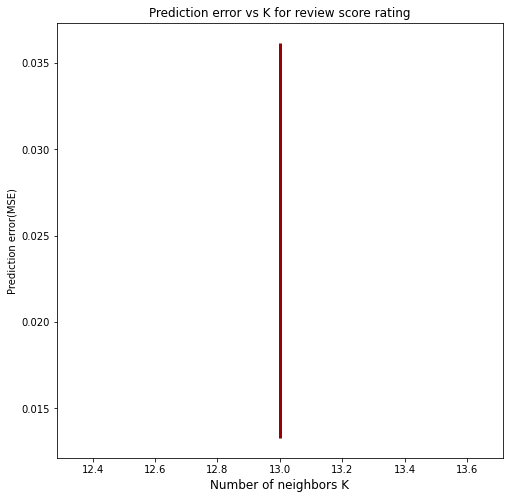

In [259]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(K, mean_rating, yerr=std_rating,lw=3,color='#990000')
plt.xlabel("Number of neighbors K",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs K for review score rating")
plt.show()

# Model for accuracy

In [262]:
K = np.arange(1,100,10)
n_fold = KFold(n_splits=10)
scores_mean_accuracy = {}
scores_std_accuracy = {}
mean_rating_accuracy = []
std_rating_accuracy = []
for k in K:
    scores = []
    for train,test in n_fold.split(X):
        model = KNeighborsRegressor(k).fit(X[train],y_target_accuracy[train])
        y_predict = model.predict(X[test])
        error = mean_squared_error(y_target_accuracy[test],y_predict)
        scores.append(error)
    mean_rating_accuracy.append(np.array(scores).mean())
    std_rating_accuracy.append(np.array(scores).std())
    scores_mean_accuracy[k] = (np.array(scores).mean())
    scores_std_accuracy[k] = (np.array(scores).std())

In [263]:
scores_mean_accuracy

{13: 0.005255002540411303}

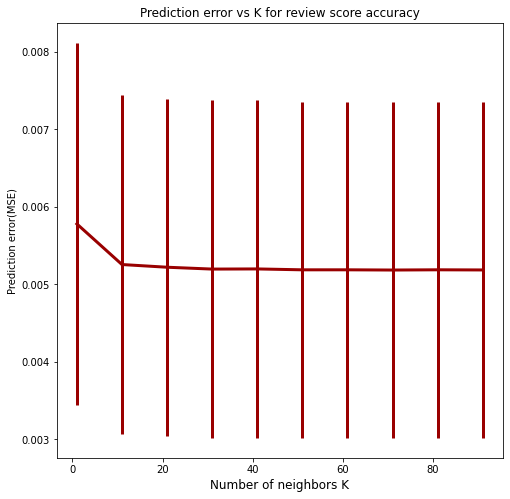

In [252]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(K, mean_rating_accuracy, yerr=std_rating_accuracy,lw=3,color='#990000')
plt.xlabel("Number of neighbors K",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs K for review score accuracy")
plt.show()

# Model for cleanliness

In [299]:
K = np.arange(1,100,20)
n_fold = KFold(n_splits=10)
mean_cleanliness = []
std_cleanliness = []
scores_mean_cleanliness = {}
scores_std_cleanliness = {}
for k in K:
    scores = []
    for train,test in n_fold.split(X):
        model = KNeighborsRegressor(k).fit(X[train],y_target_cleanliness[train])
        y_predict = model.predict(X[test])
        error = mean_squared_error(y_target_cleanliness[test],y_predict)
        scores.append(error)
    mean_cleanliness.append(np.array(scores).mean())
    std_cleanliness.append(np.array(scores).std())

    scores_mean_cleanliness[k] = (np.array(scores).mean())
    scores_std_cleanliness[k] = (np.array(scores).std())

In [300]:
scores_mean_cleanliness

{1: 0.011768590439899581,
 21: 0.009984671904387418,
 41: 0.009914654269526637,
 61: 0.009855119955112759,
 81: 0.009857247124507942}

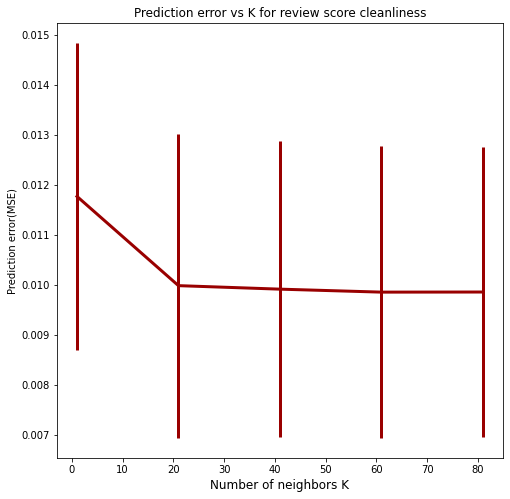

In [305]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(K, mean_cleanliness, yerr=std_cleanliness,lw=3,color='#990000')
plt.xlabel("Number of neighbors K",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs K for review score cleanliness")
plt.show()

# Model for checkin

In [302]:
K = np.arange(1,100,20)
n_fold = KFold(n_splits=10)
mean_checkin = []
std_checkin = []
scores_mean_checkin = {}
scores_std_checkin = {}
for k in K:
    scores = []
    for train,test in n_fold.split(X):
        model = KNeighborsRegressor(k).fit(X[train],y_target_checkin[train])
        y_predict = model.predict(X[test])
        error = mean_squared_error(y_target_checkin[test],y_predict)
        scores.append(error)
    mean_checkin.append(np.array(scores).mean())
    std_checkin.append(np.array(scores).std())

    scores_mean_checkin[k] = (np.array(scores).mean())
    scores_std_checkin[k] = (np.array(scores).std())

In [303]:
scores_mean_checkin

{1: 0.004823519600762486,
 21: 0.004248806695585921,
 41: 0.004240109535869696,
 61: 0.004233446645138204,
 81: 0.004236380507876592}

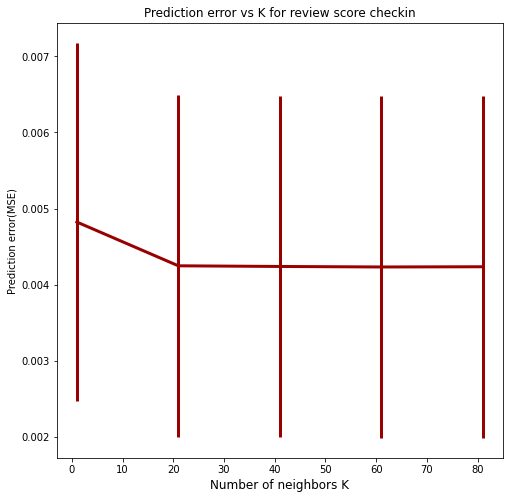

In [306]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(K, mean_checkin, yerr=std_checkin,lw=3,color='#990000')
plt.xlabel("Number of neighbors K",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs K for review score checkin")
plt.show()

# Model for communication

In [307]:
K = np.arange(1,100,20)
n_fold = KFold(n_splits=10)
mean_communication = []
std_communication = []
scores_mean_communication = {}
scores_std_communication = {}
for k in K:
    scores = []
    for train,test in n_fold.split(X):
        model = KNeighborsRegressor(k).fit(X[train],y_target_communication[train])
        y_predict = model.predict(X[test])
        error = mean_squared_error(y_target_communication[test],y_predict)
        scores.append(error)
    mean_communication.append(np.array(scores).mean())
    std_communication.append(np.array(scores).std())
    scores_mean_communication[k] = (np.array(scores).mean())
    scores_std_communication[k] = (np.array(scores).std())

In [308]:
scores_mean_communication

{1: 0.004097702656396641,
 21: 0.0036970574364599607,
 41: 0.003690008718513825,
 61: 0.0036972628676427144,
 81: 0.003701838662242223}

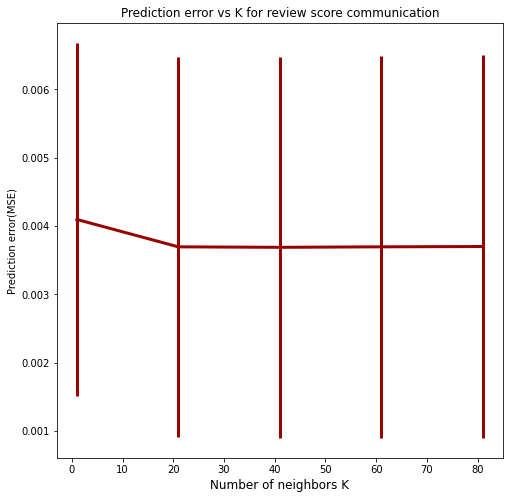

In [309]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(K, mean_communication, yerr=std_communication,lw=3,color='#990000')
plt.xlabel("Number of neighbors K",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs K for review score communication")
plt.show()

# Model for location

In [310]:
K = np.arange(1,100,10)
n_fold = KFold(n_splits=10)
mean_location = []
std_location = []
scores_mean_location = {}
scores_std_location = {}
for k in K:
    scores = []
    for train,test in n_fold.split(X):
        model = KNeighborsRegressor(k).fit(X[train],y_target_location[train])
        y_predict = model.predict(X[test])
        error = mean_squared_error(y_target_location[test],y_predict)
        scores.append(error)
    mean_location.append(np.array(scores).mean())
    std_location.append(np.array(scores).std())

    scores_mean_location[k] = (np.array(scores).mean())
    scores_std_location[k] = (np.array(scores).std())

In [311]:
scores_mean_location

{1: 0.007584390128536858,
 11: 0.006333401090963307,
 21: 0.006250554688018005,
 31: 0.006216406908031621,
 41: 0.006195296244456446,
 51: 0.006175630074668901,
 61: 0.006174990500243729,
 71: 0.006176736781060987,
 81: 0.006173268709652173,
 91: 0.006172735411203624}

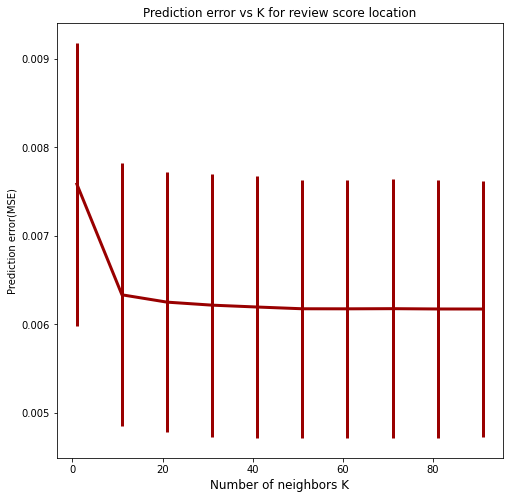

In [312]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(K, mean_location, yerr=std_location,lw=3,color='#990000')
plt.xlabel("Number of neighbors K",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs K for review score location")
plt.show()

# Model for values

In [295]:
K = np.arange(1,100,10)
n_fold = KFold(n_splits=10)
mean_values = []
std_values = []
scores_mean_values = {}
scores_std_values = {}
for k in K:
    scores = []
    for train,test in n_fold.split(X):
        model = KNeighborsRegressor(k).fit(X[train],y_target_values[train])
        y_predict = model.predict(X[test])
        error = mean_squared_error(y_target_values[test],y_predict)
        scores.append(error)
    mean_values.append(np.array(scores).mean())
    std_values.append(np.array(scores).std())

    scores_mean_values[k] = (np.array(scores).mean())
    scores_std_values[k] = (np.array(scores).std())

In [296]:
scores_mean_values

{1: 0.007182121513277517,
 11: 0.006185052853551702,
 21: 0.006132270715834738,
 31: 0.006118310481022729,
 41: 0.00611358657966026,
 51: 0.006098065360008905,
 61: 0.006102967938586912,
 71: 0.006104215399249517,
 81: 0.006104995356304035,
 91: 0.006105190753644764}

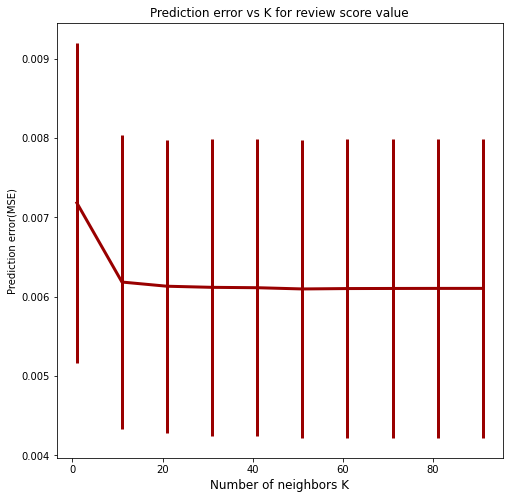

In [297]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(K, mean_values, yerr=std_values,lw=3,color='#990000')
plt.xlabel("Number of neighbors K",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs K for review score value")
plt.show()

In [149]:
# for i in range(0,len(y_target[test])):
#     print("Original:{} Predicted:{}".format(y_target[i],y_predict[i]))

Original:[4.78] Predicted:[4.6409165]
Original:[4.79] Predicted:[4.7100611]
Original:[4.74] Predicted:[4.70755601]
Original:[4.84] Predicted:[4.64934827]
Original:[4.63] Predicted:[4.66034623]
Original:[4.69] Predicted:[4.54215886]
Original:[4.88] Predicted:[4.64126273]
Original:[4.6] Predicted:[4.56299389]
Original:[4.56] Predicted:[4.58179226]
Original:[4.93] Predicted:[4.61977597]
Original:[4.92] Predicted:[4.59429735]
Original:[4.67] Predicted:[4.64647658]
Original:[4.61] Predicted:[4.5614053]
Original:[4.48] Predicted:[4.66270876]
Original:[4.67] Predicted:[4.6604277]
Original:[4.87] Predicted:[4.65643585]
Original:[4.8] Predicted:[4.51747454]
Original:[4.84] Predicted:[4.66224033]
Original:[4.61] Predicted:[4.66737271]
Original:[4.84] Predicted:[4.66254582]
Original:[4.59] Predicted:[4.67505092]
Original:[4.19] Predicted:[4.6010998]
Original:[4.67] Predicted:[4.72818737]
Original:[4.7] Predicted:[4.54228106]
Original:[4.62] Predicted:[4.7286558]
Original:[4.81] Predicted:[4.62439

In [150]:
# scores_std

{1: 0.48445128138050714,
 11: 0.2752458331674571,
 21: 0.27220893641433175,
 31: 0.27278354338902316,
 41: 0.27121481611363923,
 51: 0.27216902987943936,
 61: 0.27165172725625136,
 71: 0.2716772442289671,
 81: 0.27176033337690286,
 91: 0.27205933566876284,
 101: 0.2726216288917188,
 111: 0.2729981791102781,
 121: 0.2732118510872206,
 131: 0.27375155447107996,
 141: 0.27372307660126305,
 151: 0.27312284030703077,
 161: 0.2732667107593064,
 171: 0.2729025178899209,
 181: 0.2730308934868482,
 191: 0.2725621410554147,
 201: 0.2725608014239282,
 211: 0.272733317120987,
 221: 0.272846754514788,
 231: 0.27263846930755103,
 241: 0.27280419010911244,
 251: 0.2729541630759164,
 261: 0.27296216393440026,
 271: 0.27308546602572353,
 281: 0.2732313331143657,
 291: 0.27316936482443827,
 301: 0.2730444796272976,
 311: 0.2733384083871818,
 321: 0.27333114175127865,
 331: 0.273469877615412,
 341: 0.27355113665283276,
 351: 0.27354291402735464,
 361: 0.27383084823903947,
 371: 0.2738557595806947,
 381: 

In [89]:
# param_grid = dict(n_neighbors=K)

In [90]:
# knn = KNeighborsRegressor()
# grid = GridSearchCV(knn,param_grid,cv=10)

In [91]:
# grid_search = grid.fit(X,y_target)

In [92]:
# grid_search.best_params_

{'n_neighbors': 99}

In [93]:
# columns = (df.iloc[:, np.r_[2:19, 27:1055]].columns)

In [94]:
# coef_weight = {}
# for i in range(0,len(columns)):
#     coef_weight[columns[i]] = model.coef_[i]

AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

In [95]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target, random_state=0)


In [96]:
# model = DummyRegressor(strategy='median').fit(X_train,y_train)

In [97]:
# y_predict = model.predict(X_test)

In [98]:
# print(mean_squared_error(y_test,y_predict))

0.653641442622951


# Scaling

In [158]:
# import pandas as pd
# import numpy as np
# data = pd.read_csv("listing_review_cleaned.csv")

In [159]:
# from sklearn.preprocessing import StandardScaler
# cols = ['host_total_listings_count','accommodates','bedrooms','beds','price','minimum_nights','maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30','availability_60','availability_90','availability_365','number_of_reviews','host_since_days','number_of_amenities','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

In [160]:
# model = StandardScaler()
# features_df = data[cols]
# type(features_df)

pandas.core.frame.DataFrame

In [161]:
# gg_scaled = model.fit_transform(features_df.to_numpy())
# gg_scaled = pd.DataFrame(gg_scaled, columns = cols)

In [162]:
# data['host_total_listings_count'] = gg_scaled['host_total_listings_count']
# data['accommodates'] = gg_scaled['accommodates']
# data['bedrooms'] = gg_scaled['bedrooms']
# data['beds'] = gg_scaled['beds']
# data['price'] = gg_scaled['price']
# data['minimum_nights'] = gg_scaled['minimum_nights']
# data['maximum_nights'] = gg_scaled['maximum_nights']
# data['minimum_nights_avg_ntm'] = gg_scaled['minimum_nights_avg_ntm']
# data['maximum_nights_avg_ntm'] = gg_scaled['maximum_nights_avg_ntm']
# data['availability_30'] = gg_scaled['availability_30']
# data['availability_60'] = gg_scaled['availability_60']
# data['availability_90'] = gg_scaled['availability_90']
# data['availability_365'] = gg_scaled['availability_365']
# data['number_of_reviews'] = gg_scaled['number_of_reviews']
# data['host_since_days'] = gg_scaled['host_since_days']
# data['number_of_amenities'] = gg_scaled['number_of_amenities']
# data['calculated_host_listings_count'] = gg_scaled['calculated_host_listings_count']
# data['calculated_host_listings_count_entire_homes'] = gg_scaled['calculated_host_listings_count_entire_homes']
# data['calculated_host_listings_count_private_rooms'] = gg_scaled['calculated_host_listings_count_private_rooms']
# data['calculated_host_listings_count_shared_rooms'] = gg_scaled['calculated_host_listings_count_shared_rooms']

In [163]:
# X = data.iloc[:, np.r_[1:19, 27:555]].values
# y_target = data.iloc[:,[21]].values
# y_target

array([[4.83],
       [4.86],
       [4.77],
       ...,
       [5.  ],
       [5.  ],
       [5.  ]])

In [164]:
# K = np.arange(1,500,10)
# n_fold = KFold(n_splits=10)
# scores_mean = {}
# scores_std = {}
# for k in K:
#     scores = []
#     for train,test in n_fold.split(X):
#         model = KNeighborsRegressor(k).fit(X[train],y_target[train])
#         y_predict = model.predict(X[test])
#         error = mean_squared_error(y_target[test],y_predict)
#         scores.append(mean_squared_error(y_target[test],y_predict))
#     scores_mean[k] = (np.array(scores).mean())
#     scores_std[k] = (np.array(scores).std())

In [165]:
# scores_mean


{1: 0.7054933751620496,
 11: 0.16364808985713014,
 21: 0.15786832571100687,
 31: 0.15665048743879165,
 41: 0.15411910770653026,
 51: 0.15423163756561686,
 61: 0.15380851738438733,
 71: 0.15405124300619605,
 81: 0.15359975042916302,
 91: 0.1536872573560141,
 101: 0.1534582207893564,
 111: 0.15337940885094156,
 121: 0.1536082049160401,
 131: 0.1534105982929367,
 141: 0.15332205706291116,
 151: 0.15329644378895319,
 161: 0.15322395064178831,
 171: 0.15366688948145973,
 181: 0.1534899128107911,
 191: 0.15349904431567177,
 201: 0.15322954066692612,
 211: 0.15327896870547442,
 221: 0.15323800313084823,
 231: 0.15298991422081004,
 241: 0.15304910630694935,
 251: 0.1530514402049445,
 261: 0.15300391351879786,
 271: 0.1529148250544889,
 281: 0.15283091609838534,
 291: 0.15285517085809186,
 301: 0.1528257026893394,
 311: 0.15279196002653217,
 321: 0.1527398854439285,
 331: 0.15275941770824833,
 341: 0.15281970475240228,
 351: 0.15283949312961492,
 361: 0.15281235654724318,
 371: 0.15271849771324

In [126]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LassoCV,Lasso, Ridge,LinearRegression
# from sklearn.metrics import mean_squared_error
# C = [0.01,0.1,1,10,100,500,1000,5000,10000,50000,100000]
# n_fold = KFold(n_splits=10)
# print(C)

[0.01, 0.1, 1, 10, 100, 500, 1000, 5000, 10000, 50000, 100000]


In [127]:
# mean_error=[]
# std_error=[]
# for c in C:
#     model = Lasso(alpha=c)
# #     model = LinearRegression()
#     mse_arr = []
#     for train,test in n_fold.split(X):
#         l_model = model.fit(X[train],y_target[train])
#         y_predict = model.predict(X[test])
# #         print("MSE",mean_squared_error(y_target[test],y_predict))
#         print("Predicted",y_predict)
#         mse_arr.append(mean_squared_error(y_target[test],y_predict))
#     mean_error.append(np.array(mse_arr).mean())
#     std_error.append(np.array(mse_arr).std())
        

Predicted [4.87632576 4.85602891 4.69641308 5.00075835 4.41671418 4.6876732
 4.69873775 4.60647974 4.59113614 4.71996098 4.87267153 4.46696968
 4.48700143 4.44193236 4.68586703 4.44724916 4.59383334 4.80279739
 4.69571074 4.79409342 4.64144806 4.38380694 4.63371834 4.79543036
 4.55897174 4.82128829 4.72097382 4.72302819 5.00774578 4.64734193
 4.36750153 4.37149889 4.79863447 4.50050526 4.92251351 4.46433808
 4.54756074 4.29341604 4.52536303 4.51317589 4.93739006 4.76792149
 4.64079472 4.81589967 4.54442775 4.73302405 4.82568115 4.68313219
 4.75934346 4.64647294 4.53620051 4.44893512 4.84056634 4.52252647
 4.56430175 4.77048492 4.729397   4.7585559  4.54909235 4.43876953
 4.66743629 4.55447179 4.65285775 4.74839437 4.7259461  4.73652933
 4.45443702 4.72382701 4.51425255 4.56605727 4.69883359 4.73743657
 4.35079998 4.82746674 4.70883848 4.69841968 4.52578739 4.5569307
 4.20662656 4.62662841 4.5862738  4.31208578 4.896916   4.90227282
 4.65943168 4.768907   4.60930428 4.53227877 4.535709 

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+03, tolerance: 3.067e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.56510668 4.58564005 4.57614891 4.55009518 4.63585898 4.69824899
 4.57005956 4.62822006 4.55580469 4.55281753 4.57009739 4.61808273
 4.57111884 4.5616277  4.55875403 4.56193035 4.57728386 4.57679052
 4.5851876  4.66822447 4.63127678 4.60106922 4.65422985 4.61172856
 4.58174493 4.56446507 4.59604373 4.64950243 4.58166774 4.56446354
 4.55584253 4.57584473 4.55145865 4.6776369  4.63052168 4.5586027
 4.54741067 4.61789663 4.58159207 4.56143854 4.56990976 4.57304672
 4.63797144 4.58166774 4.57686618 4.58064781 4.55572903 4.57308455
 4.62269513 4.58556286 4.62186436 4.5758069  4.57017305 4.5824622
 4.69336414 4.57085402 4.55289319 4.59558517 4.56737504 4.56143854
 4.61467789 4.56718589 4.63283093 4.5883987  4.70199126 4.56431221
 4.5853374  4.54934466 4.5623465  4.56945578 4.57040004 4.56748854
 4.58280726 4.62363939 4.56495535 4.54506817 4.57312239 4.6122582
 4.61891502 4.61335379 4.6086279  4.55281753 4.65657693 4.61021682
 4.56726155 4.57308455 4.61437829 4.65517564 4.57308455

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+03, tolerance: 2.797e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59157016 4.64531688 4.58843978 4.60188802 4.58401284 4.62566741
 4.56957835 4.58290331 4.56428843 4.58573877 4.58867094 4.60284345
 4.61464068 4.62435755 4.62651709 4.61831254 4.54533454 4.58020441
 4.63311262 4.5803431  4.59900421 4.62687152 4.60467938 4.63961089
 4.59371429 4.59636695 4.58025064 4.60257723 4.61060111 4.66235355
 4.57485286 4.61590643 4.5917859  4.64218651 4.58293413 4.62344623
 4.63854335 4.58557138 4.57488368 4.64630101 4.6176786  4.61663975
 4.58037392 4.64164503 4.58020441 4.58299577 4.57940096 4.64335131
 4.57559042 4.62386442 4.62731841 4.56146626 4.59917372 4.61573692
 4.61296098 4.60441741 4.64864547 4.64977253 4.57752093 4.57224642
 4.61276065 4.5753768  4.65703706 4.57216937 4.58068213 4.59675221
 4.62051831 4.62640922 4.58294954 4.57798323 4.55882901 4.59908126
 4.58563302 4.59146229 4.61016963 4.62210555 4.61556741 4.58438268
 4.62349458 4.62438837 4.57753634 4.5828879  4.5828879  4.63412065
 4.59411495 4.64096698 4.57752093 4.57753634 4.59362

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+03, tolerance: 2.996e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.57655176 4.5918199  4.58043844 4.61637162 4.59729381 4.55881103
 4.62449592 4.62444837 4.67322465 4.61763737 4.57105407 4.5681003
 4.59590917 4.60828247 4.61183062 4.58060486 4.59463102 4.58834978
 4.62823995 4.56193123 4.6402871  4.61471307 4.5714107  4.61419002
 4.6286679  4.59594433 4.60802095 4.59772744 4.59000732 4.5836005
 4.60840135 4.59132063 4.6364118  4.60412857 4.58014176 4.55569083
 4.62085836 4.55876348 4.59875545 4.56802897 4.62368757 4.62485823
 4.59601565 4.61258572 4.61445154 4.61728644 4.59403665 4.61256764
 4.60768241 4.62623717 4.58027202 4.57417427 4.62327771 4.61944426
 4.65408689 4.59376375 4.55876348 4.57355043 4.5713156  4.56490878
 4.66387543 4.55569083 4.63889678 4.6048532  4.55815773 4.62704552
 4.62001486 4.58641731 4.57719937 4.57110162 4.57977945 4.58343976
 4.54706726 4.56414229 4.63157412 4.56490878 4.56490878 4.54983083
 4.62952379 4.61999678 4.54971196 4.5653605  4.59794142 4.69793608
 4.57126805 4.61175929 4.60806281 4.56798142 4.6791265

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.224e+02, tolerance: 3.266e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.194e+02, tolerance: 3.067e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.740e+02, tolerance: 3.052e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.267e+02, tolerance: 2.797e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114 4.60652114
 4.60652114 4.60652114 4.60652114 4.60652114 4.60652

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.217e+02, tolerance: 2.996e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.738e+02, tolerance: 3.104e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.123e+01, tolerance: 3.331e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074 4.58223074
 4.58223074 4.58223074 4.58223074 4.58223074 4.58223

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.229e+02, tolerance: 3.243e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814 4.58856814
 4.58856814 4.58856814 4.58856814 4.58856814 4.58856

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.328e+02, tolerance: 3.299e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.72839821 4.72841446 4.72841914 4.72842065 4.72849302 4.72850892
 4.72851134 4.72852742 4.72853717 4.72857833 4.72864642 4.72865175
 4.72865807 4.7286722  4.72869088 4.72872946 4.72873707 4.72879387
 4.72884599 4.72885573 4.72887618 4.72888243 4.72889557 4.72901569
 4.72902124 4.72915659 4.72920283 4.72927872 4.7292829  4.72928354
 4.72928547 4.72929598 4.72931277 4.72934645 4.72936814 4.72941189
 4.72942946 4.72945131 4.72945967 4.72950291 4.72951542 4.72958691
 4.7296259  4.72965576 4.7297585  4.72988455 4.72988904 4.72990691
 4.73005071 4.73006991 4.73007635 4.73012565 4.73023902 4.73023962
 4.73025215 4.73026579 4.73027727 4.73027829 4.73027893 4.73027995
 4.73029545 4.73033446 4.7303663  4.73039174 4.73039349 4.73040022
 4.73040921 4.73044057 4.73050947 4.73053034 4.73055563 4.73055803
 4.73069666 4.73071884 4.7307264  4.7308066  4.73081877 4.73084392
 4.73084674 4.73086045 4.7308703  4.73087197 4.73088313 4.73088855
 4.73089667 4.73090738 4.73091441 4.73094699 4.73100

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.745e-01, tolerance: 3.266e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842 4.58787842
 4.58787842 4.58787842 4.58787842 4.58787842 4.58787

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.288e+00, tolerance: 3.067e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911 4.59841911
 4.59841911 4.59841911 4.59841911 4.59841911 4.59841

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.926e+01, tolerance: 3.052e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.346e+01, tolerance: 2.996e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.115e+01, tolerance: 3.104e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.139e+01, tolerance: 3.299e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.72839821 4.72841446 4.72841914 4.72842065 4.72849302 4.72850892
 4.72851134 4.72852742 4.72853717 4.72857833 4.72864642 4.72865175
 4.72865807 4.7286722  4.72869088 4.72872946 4.72873707 4.72879387
 4.72884599 4.72885573 4.72887618 4.72888243 4.72889557 4.72901569
 4.72902124 4.72915659 4.72920283 4.72927872 4.7292829  4.72928354
 4.72928547 4.72929598 4.72931277 4.72934645 4.72936814 4.72941189
 4.72942946 4.72945131 4.72945967 4.72950291 4.72951542 4.72958691
 4.7296259  4.72965576 4.7297585  4.72988455 4.72988904 4.72990691
 4.73005071 4.73006991 4.73007635 4.73012565 4.73023902 4.73023962
 4.73025215 4.73026579 4.73027727 4.73027829 4.73027893 4.73027995
 4.73029545 4.73033446 4.7303663  4.73039174 4.73039349 4.73040022
 4.73040921 4.73044057 4.73050947 4.73053034 4.73055563 4.73055803
 4.73069666 4.73071884 4.7307264  4.7308066  4.73081877 4.73084392
 4.73084674 4.73086045 4.7308703  4.73087197 4.73088313 4.73088855
 4.73089667 4.73090738 4.73091441 4.73094699 4.73100

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+00, tolerance: 3.052e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368 4.59640368
 4.59640368 4.59640368 4.59640368 4.59640368 4.59640

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.403e+00, tolerance: 2.996e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031 4.59843031
 4.59843031 4.59843031 4.59843031 4.59843031 4.59843

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.265e+00, tolerance: 3.104e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357 4.59537357
 4.59537357 4.59537357 4.59537357 4.59537357 4.59537

/Users/aokiji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.455e-01, tolerance: 3.299e-01
  model = cd_fast.enet_coordinate_descent(


Predicted [4.72839821 4.72841446 4.72841914 4.72842065 4.72849302 4.72850892
 4.72851134 4.72852742 4.72853717 4.72857833 4.72864642 4.72865175
 4.72865807 4.7286722  4.72869088 4.72872946 4.72873707 4.72879387
 4.72884599 4.72885573 4.72887618 4.72888243 4.72889557 4.72901569
 4.72902124 4.72915659 4.72920283 4.72927872 4.7292829  4.72928354
 4.72928547 4.72929598 4.72931277 4.72934645 4.72936814 4.72941189
 4.72942946 4.72945131 4.72945967 4.72950291 4.72951542 4.72958691
 4.7296259  4.72965576 4.7297585  4.72988455 4.72988904 4.72990691
 4.73005071 4.73006991 4.73007635 4.73012565 4.73023902 4.73023962
 4.73025215 4.73026579 4.73027727 4.73027829 4.73027893 4.73027995
 4.73029545 4.73033446 4.7303663  4.73039174 4.73039349 4.73040022
 4.73040921 4.73044057 4.73050947 4.73053034 4.73055563 4.73055803
 4.73069666 4.73071884 4.7307264  4.7308066  4.73081877 4.73084392
 4.73084674 4.73086045 4.7308703  4.73087197 4.73088313 4.73088855
 4.73089667 4.73090738 4.73091441 4.73094699 4.73100

In [128]:
# mean_error

[0.40688612438772065,
 0.563824246057695,
 0.5740552195391452,
 0.5740552195391452,
 0.5740552195391453,
 0.5740552195391451,
 0.5740552195391448,
 0.574055219539144,
 0.574055219539143,
 0.5740552195391342,
 0.574055219539123]

In [131]:
# columns = (df.iloc[:, np.r_[2:19, 27:555]].columns)

In [132]:
# coef_weight = {}
# for i in range(0,len(columns)):
#     coef_weight[columns[i]] = model.coef_[i]

In [133]:
# coef_weight

{'host_response_rate': 2.1238995933282415e-19,
 'host_acceptance_rate': -0.0,
 'host_is_superhost': -0.0,
 'host_total_listings_count': 0.0,
 'accommodates': -0.0,
 'bedrooms': 0.0,
 'beds': 0.0,
 'price': 0.0,
 'minimum_nights': -0.0,
 'maximum_nights': 0.0,
 'minimum_nights_avg_ntm': -0.0,
 'maximum_nights_avg_ntm': 0.0,
 'has_availability': -0.0,
 'availability_30': 0.0,
 'availability_60': 0.0,
 'availability_90': 0.0,
 'availability_365': 0.0,
 'instant_bookable': 0.0,
 'calculated_host_listings_count': -0.0,
 'calculated_host_listings_count_entire_homes': -0.0,
 'calculated_host_listings_count_private_rooms': -0.0,
 'calculated_host_listings_count_shared_rooms': -0.0,
 'reviews_per_month': -0.0,
 'host_since_days': 0.0,
 'a few days or more': 0.0,
 'within a day': 0.0,
 'within a few hours': -0.0,
 'within an hour': 0.0,
 'Dn Laoghaire-Rathdown': 0.0,
 'Dublin City': 0.0,
 'Fingal': -0.0,
 'South Dublin': 0.0,
 'total_host_verifications': 0.0,
 'host_identity_verified_int': 0.0,
